۱-چیست و شرط لازم برای استفاده از آنها چیستensemble learning روش های

Bagging iverfita ro kenare ham mizre normal she
Boosting underfita
Stacking

۲- را برای بهبود پیشنهاد میدهید ensembleشرکتی چند مدل برای پیش بینی قیمت نهایی کالا ترین کرده ولی همه ی آنها حتی روی داده های ترین هم به خوبی پاسخگو نیستند کدام روش

Boosting

۳- دو معیار برای پیدا کردن ریشه در درخت تصمیم چیست و سه الگوریتم برای ایجاد آن را نام ببرید

Root bar asase information gain meyre gini ya antropy bala yani ebhame bidhtr mizane EA rokhdadesh v ehtmlesh kmtr bshe antropy balatrr
Id3
C4.5
C5
Cart

۴-  چی بودbootstrapمنظور از

In [ ]:
Botstrap barmigrduni pasting na

۵-  را میتوان روی داده های لیبل دار زد ؟ چه روشی پیشنهاد شماست؟pcaآیا

اره lda

In [ ]:
۶-نیاز به استقلال دارد random forest چرا

Random forest Bagging ba estimatore decition tree
پس باسد شرط لازم انسمبل ها را دارا باشد

In [ ]:
‍7-  دو دیتای داده شده را با درخت تصمیم پیش بینی کرده و درخت را پرینت بگیریدirisروی دیتاست

In [ ]:
[6.1, 2.8, 1.8, 1.9],
[8.1, 2.1, 2.5, 2.9]

In [2]:
import sklearn.datasets as datasets
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(df, y)

DecisionTreeClassifier()

In [4]:
dtree.predict([
    [6.1, 2.8, 1.8, 1.9],
    [8.1, 2.1, 2.5, 2.9]
])

/home/mhazad/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 2])

In [5]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

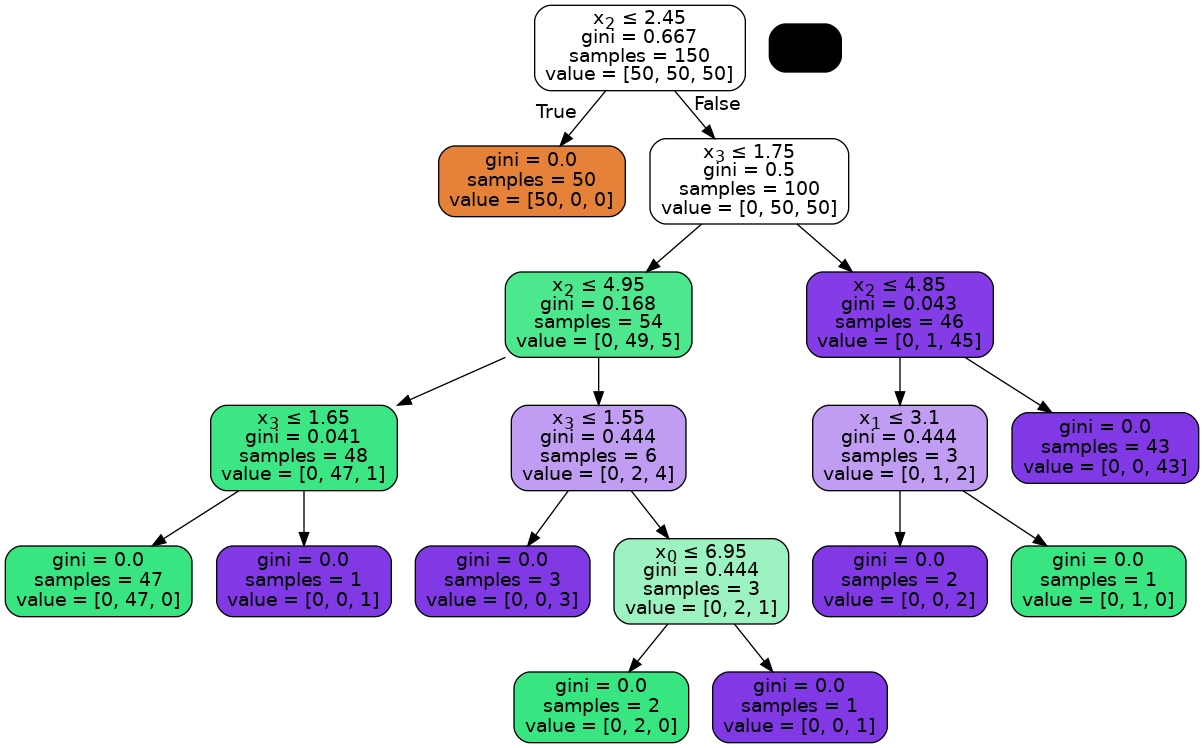

In [7]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

۸- روی دیتای پیش بینی بیماری قلبی با استفاده از
 درsvmالگوریتم 
greed search 
وrandom search
پیش بینی را انجام دهید



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [11]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.87      0.93      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.88        76
weighted avg       0.88      0.88      0.88        76



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [18]:
params = {
    'C': [0, 1, 10],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [19]:
gsh.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/home/mhazad/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mhazad/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mhazad/.local/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/home/mhazad/.local/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/home/mhazad/.local/lib/py

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10], 'gamma': ['auto', 0.1],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=10)

In [20]:
gsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [21]:
gsh.best_score_

0.8282720460090623

## linux


1-برای تنظیمات گراب بهتر لست کدوم فولدر تغییر داده شود 

2-
شما برنامه ای را برای پیش بینی قیمت کالا نوشته اید این برمامه برای ران شدن احتیاج به خواندن ورودی به عنوان کانفیگ دارد کانفیگ های برنامه بهتر است چگونه و در کجا اعمال شوند 

در فایل etc
 شودexport varدر کلاد به عنوان 
 env |gerp

3-به نظر شما نود پرینتر یا هر سخت افزار در کدام فولدر ذخیره میشود

dev

4-چیست bios کار 

در ابندا شناسایی سخت افزارها و شناسای بوتیبل ها و دادن کنترل به اون